Импорт данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib as plt
import scipy
iris = load_iris()
iris_pd=pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 61.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=a5f8e8e881e191853740435e3c746115fac0d489325e2c2aa04020f3e5eb35ac
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=c461ee40c72745676d0e324c372f82f3220e68df7e17e6a10f7afce31e86134a
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
iris_pd

EDA

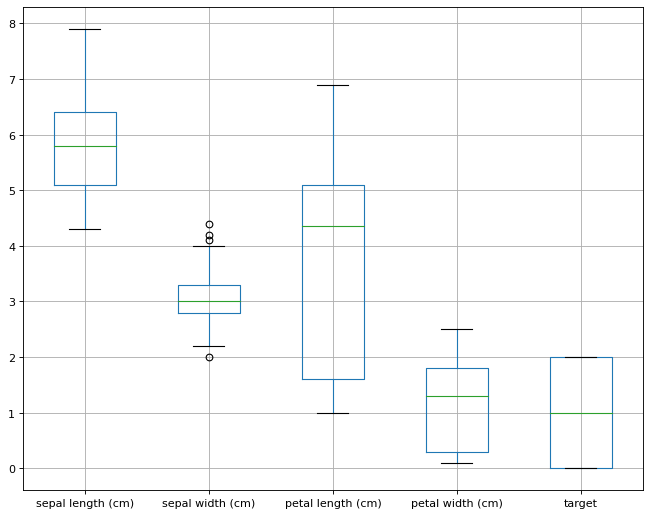

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
iris_pd.boxplot()

Как видно, данные имеют различный разброс и параметр положения, заметно наличие выброов. 

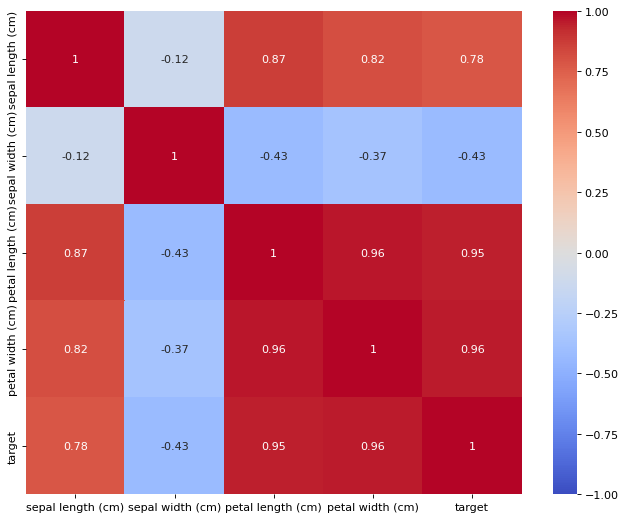

In [ ]:
import seaborn as sns
figure(figsize=(10, 8), dpi=80)
sns.heatmap(iris_pd.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

По тепловой карте видна сильная линейная взаимосвязь некоторых переменных(>0.9). 

In [ ]:
import pingouin as pg

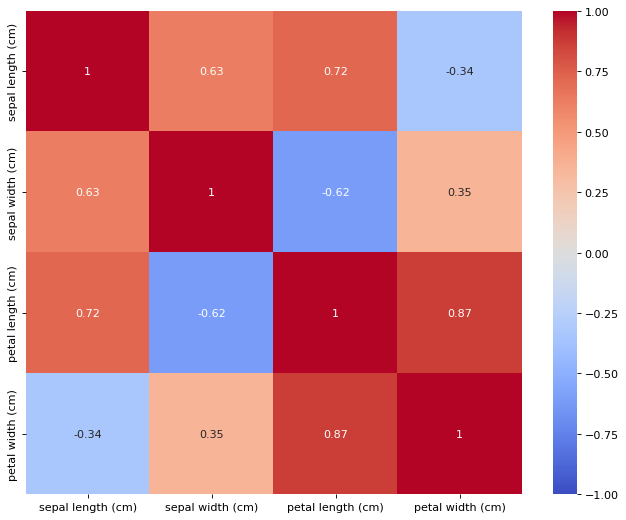

In [ ]:
figure(figsize=(10, 8), dpi=80)
sns.heatmap(iris_pd.pcorr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Частные коэффициенты корреляции в некоторых столбцах дают нам основание предпологать, что между столбцами есть линейная зависимость. Но коэф. стали меньше, что свидетельствует о влиянии признаков друг на друга.

In [ ]:
a = []
for i in iris_pd.columns:
    a.append([i ,scipy.stats.kstest(iris_pd[i],'norm')])
pd.DataFrame(a)

,0,1
0,sepal length (cm),"(0.999991460094529, 0.0)"
1,sepal width (cm),"(0.9794298858198347, 1.9343513094431768e-253)"
2,petal length (cm),"(0.8765328487477231, 1.4044248603466367e-136)"
3,petal width (cm),"(0.5459263761057697, 1.8764992713715694e-42)"
4,target,"(0.5080114127352096, 2.097019123705302e-36)"


Действительно, значение p ниже нашего порога 0,05 во всех случаях, поэтому мы отвергаем нулевую гипотезу в пользу альтернативы: данные не распределяются в соответствии с нормальным распределением.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa00fa0d950>,
      dtype=object)

<Figure size 800x640 with 0 Axes>

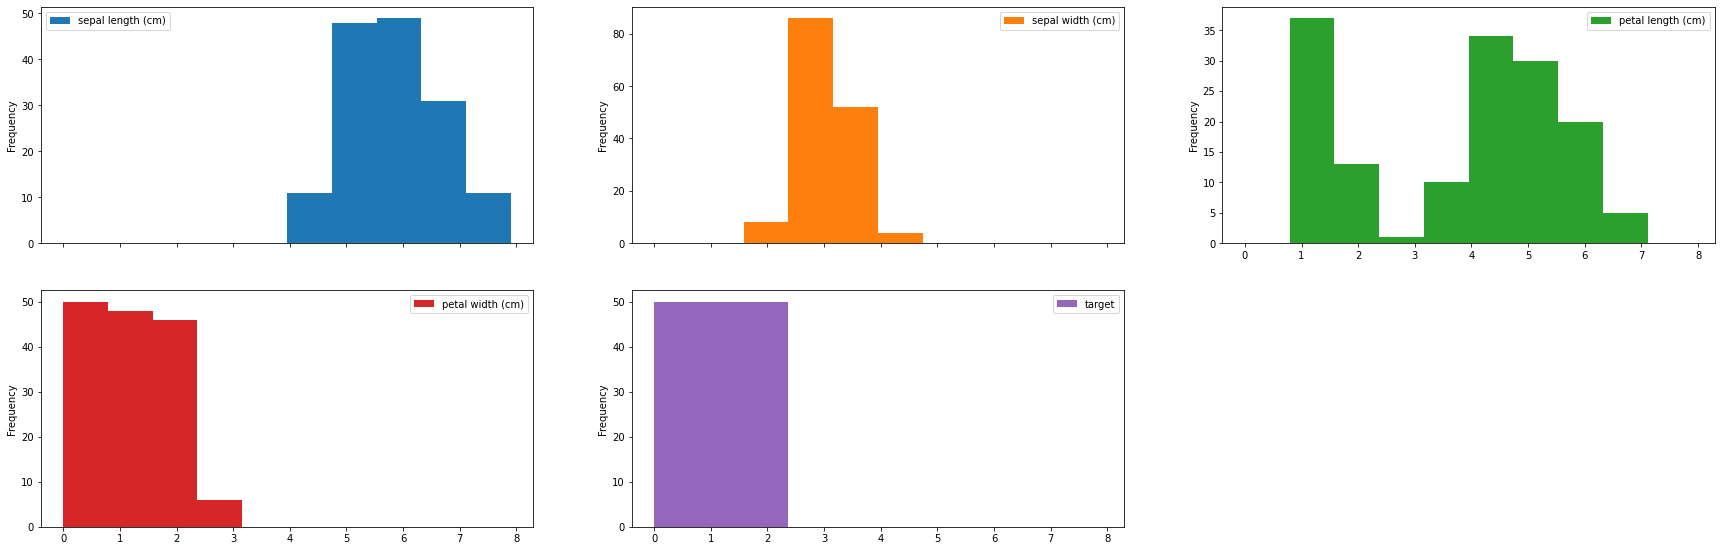

In [ ]:
figure(figsize=(10, 8), dpi=80)
plt.rcParams["figure.figsize"] = [30, 20]
iris_pd.plot(kind = 'hist',subplots=True, layout = (4,3))

Разведочный анализ данных привел к следующим выводам:

Данные не распределены нормально

Зависимость между переменными умеренная

Данные распределены с различными параметрами положения и разброса.

 Самые информативные переменные:
 
petal length(cm), sepal length (cm), petal width (cm)

  

Постороение линенйной регрессии

In [ ]:
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
data = iris_pd.drop(columns=['target'])

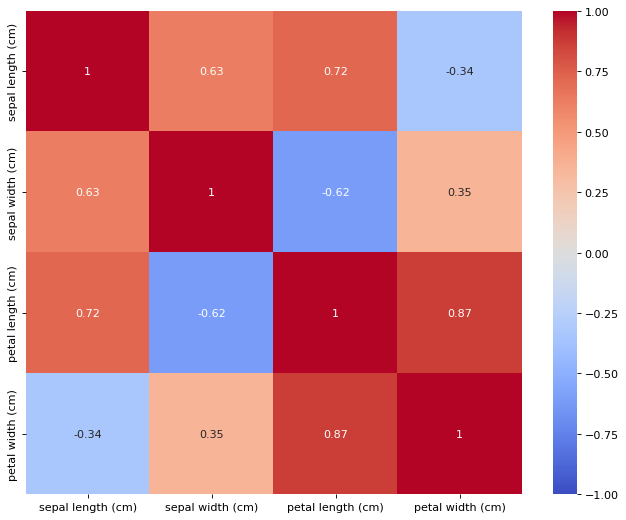

In [ ]:
figure(figsize=(10, 8), dpi=80)
sns.heatmap(data.pcorr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Определяем входные и выходные переменные:

Для парной регрессии:
Выходная - petal length (cm),	входная - sepal length (cm)	

Для множественной:
Выходная - petal length (cm), входные - все остальные

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_p = LinearRegression().fit(data['petal width (cm)'].to_numpy().reshape(-1, 1), data['petal length (cm)'])
reg_m = LinearRegression().fit(data.drop(columns=['petal length (cm)', 'sepal width (cm)']), data['petal length (cm)'])

In [ ]:
reg_p.coef_ , reg_p.intercept_

(array([2.2299405]), 1.0835580328505112)

In [ ]:
reg_m.coef_ , reg_m.intercept_

(array([0.54225562, 1.74810286]), -1.5071383768459268)

In [ ]:
train_data_p = data['petal width (cm)']
train_data_m = data.drop(columns=['petal length (cm)', 'sepal width (cm)'])
y_data = data['petal length (cm)']

In [ ]:
x_s = list(range(len(data['petal length (cm)'])))

In [ ]:
import matplotlib.pyplot as plt

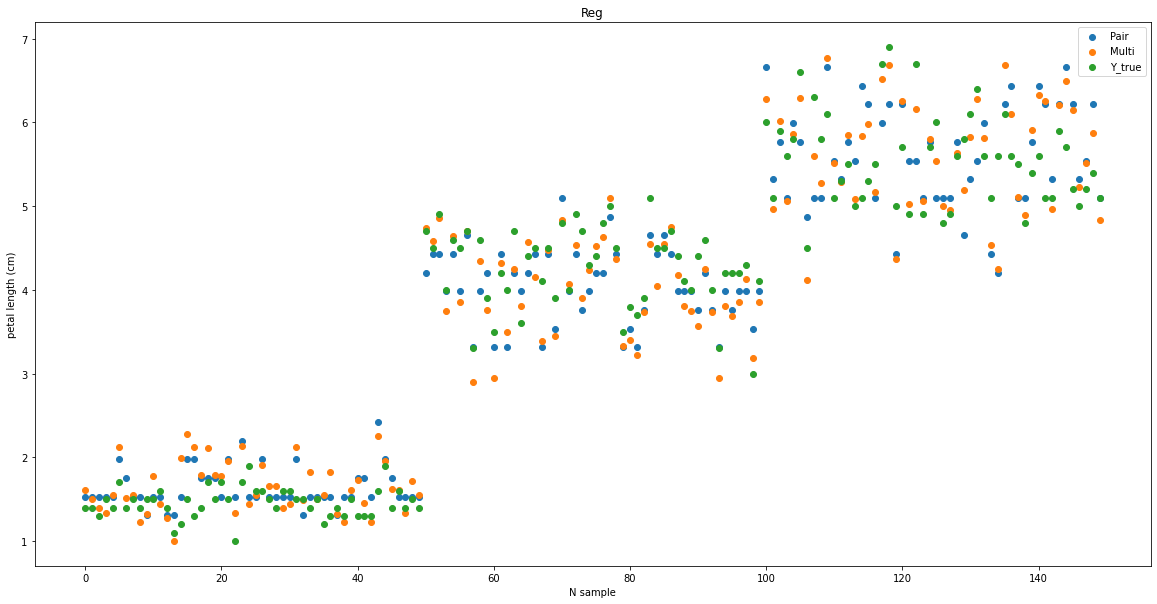

In [ ]:
plt.scatter(x_s, reg_p.predict(train_data_p.to_numpy().reshape(-1, 1)))
plt.scatter(x_s, reg_m.predict(train_data_m))
plt.scatter(x_s, y_data.to_numpy())
plt.title('Reg') 
plt.xlabel('N sample') 
plt.ylabel('petal length (cm)') 
plt.legend(['Pair', 'Multi', 'Y_true'])
plt.show()

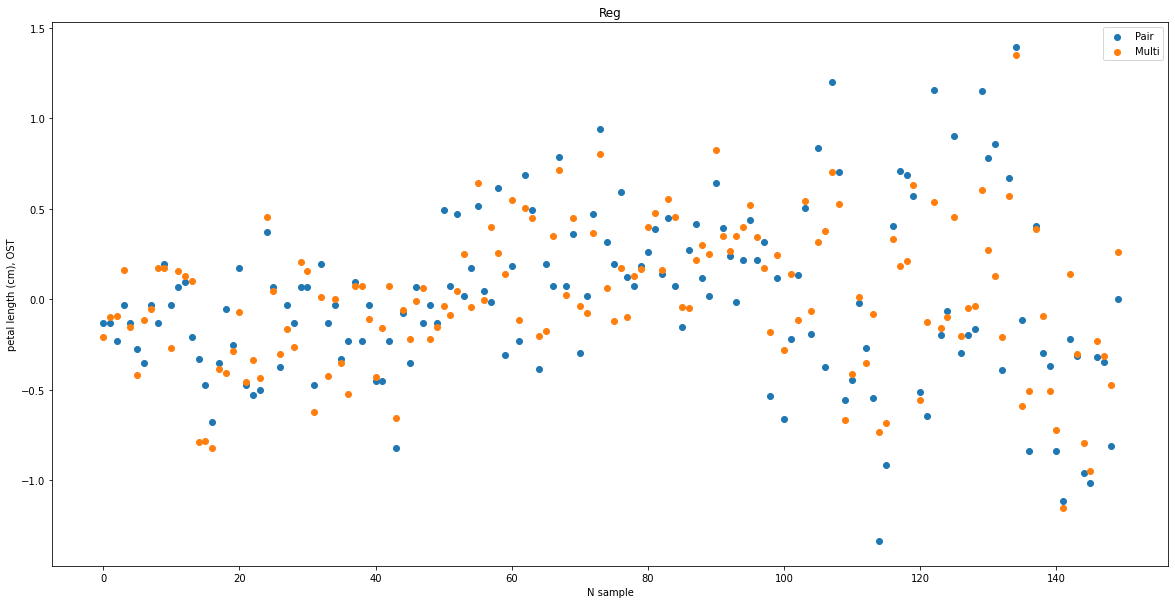

In [ ]:
plt.scatter(x_s, y_data.to_numpy()-reg_p.predict(train_data_p.to_numpy().reshape(-1, 1)))
plt.scatter(x_s, y_data.to_numpy()-reg_m.predict(train_data_m))
plt.title('Reg') 
plt.xlabel('N sample') 
plt.ylabel('petal length (cm), OST')
plt.legend(['Pair', 'Multi'])
plt.show()

In [ ]:
#Лучше множественная

In [ ]:
res = reg_p.predict(data['sepal length (cm)'].to_numpy().reshape(-1, 1)) - data['petal length (cm)'].to_numpy()

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(res)

1.3391185441384632

In [ ]:
m_score = reg_m.score(train_data_m, y_data.to_numpy()) 
p_score = reg_p.score(train_data_p.to_numpy().reshape(-1, 1), y_data.to_numpy())

In [ ]:
1 - ( 1-m_score ) * ( len(y_data) - 1 ) / ( len(y_data) - 2 - 1 )

0.947823276236446

In [ ]:
1 - ( 1-p_score ) * ( len(y_data) - 1 ) / ( len(y_data) - 1 - 1 )


0.9266173379025906

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_p = mean_absolute_error(y_data.to_numpy(), reg_p.predict(train_data_p.to_numpy().reshape(-1, 1)))
mae_m = mean_absolute_error(y_data.to_numpy() , reg_m.predict(train_data_m))
print(mae_p, mae_m)

0.36579694412763775 0.31369294102123063


In [ ]:
res = y_data.to_numpy()-reg_m.predict(train_data_m)

(array([ 2.,  8., 15., 25., 38., 33., 21.,  7.,  0.,  1.]),
 array([-1.15506199, -0.90435228, -0.65364257, -0.40293286, -0.15222316,
         0.09848655,  0.34919626,  0.59990596,  0.85061567,  1.10132538,
         1.35203508]),
 <a list of 10 Patch objects>)

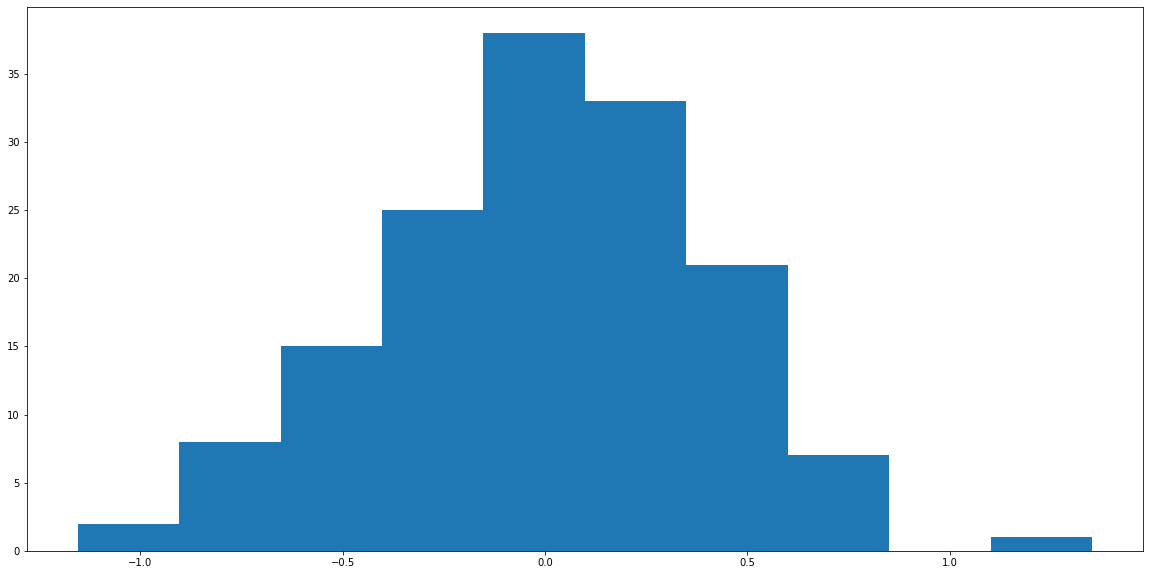

In [ ]:
plt.hist(res)

In [ ]:
scipy.stats.kstest(res,'norm')

KstestResult(statistic=0.23142153806530008, pvalue=1.5149175653583154e-07)

Предсказание зависимой переменной по вычисленному уравнению множественной регрессии

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [ ]:
y_train = train['petal length (cm)']
x_train = train.drop(columns=['petal length (cm)', 'sepal width (cm)'])
y_test = test['petal length (cm)']
x_test = test.drop(columns=['petal length (cm)', 'sepal width (cm)'])

In [ ]:
reg_m_1 = LinearRegression().fit(x_train, y_train)

In [ ]:
preds = reg_m_1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
mse

0.19060068308375172

In [ ]:
reg_m_1.score(x_test, y_test)

0.9299422457381576

Text(0, 0.5, 'petal length (cm)')

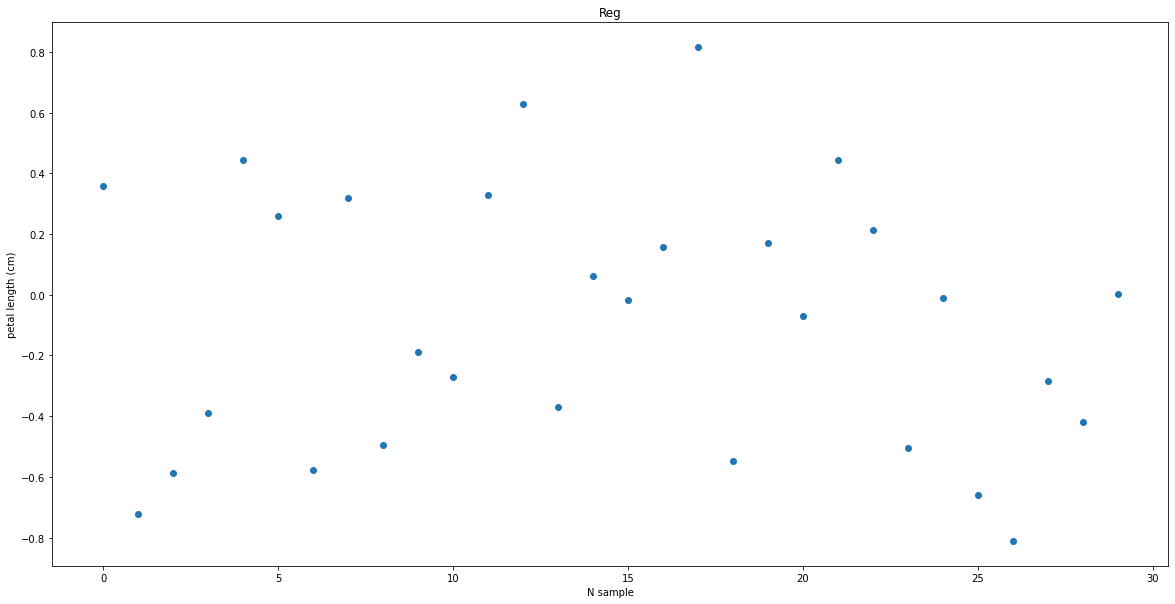

In [ ]:
plt.scatter(list(range(len(x_test))), preds - y_test)
plt.title('Reg') 
plt.xlabel('N sample') 
plt.ylabel('petal length (cm)')

In [ ]:
Q1 =  data['sepal width (cm)'].quantile(0.25)
Q3 = data['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1
data['sepal width (cm)'][(data['sepal width (cm)'] < Q1-1.5*IQR)] = Q1-1.5*IQR
data['sepal width (cm)'][(data['sepal width (cm)'] > Q3+1.5*IQR)] = Q3+1.5*IQR

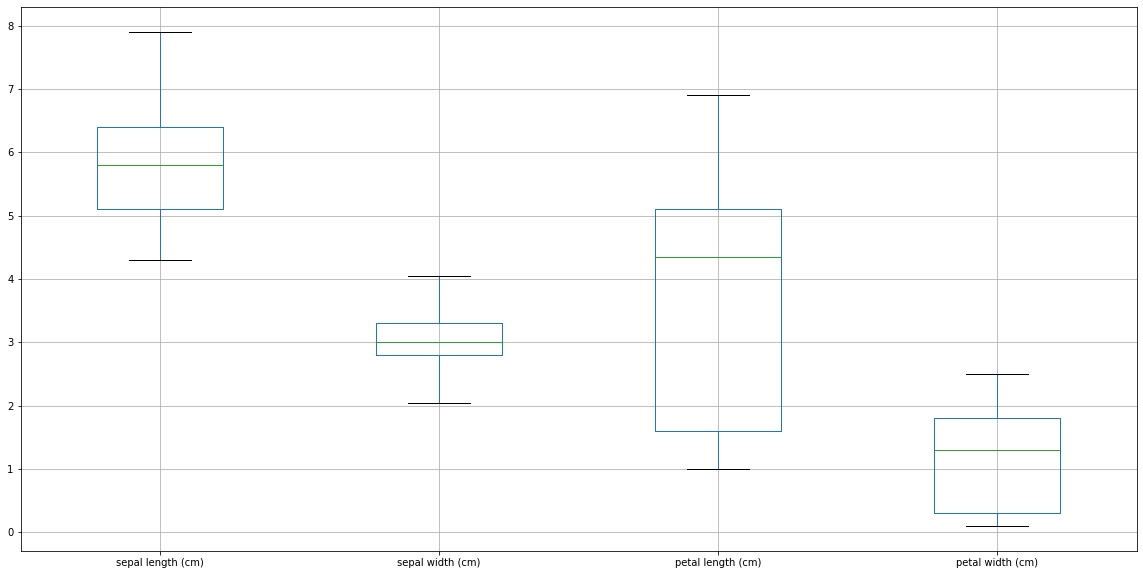

In [ ]:
data.boxplot()

In [ ]:

train, test = train_test_split(data, test_size=0.2)

In [ ]:
y_train = train['petal length (cm)']
x_train = train.drop(columns=['petal length (cm)', 'sepal width (cm)'])
y_test = test['petal length (cm)']
x_test = test.drop(columns=['petal length (cm)', 'sepal width (cm)'])

In [ ]:
reg_m_1 = LinearRegression().fit(x_train, y_train)

In [ ]:
preds = reg_m_1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
mse

0.18337455469746286

In [ ]:
reg_m_1.score(x_test, y_test)

0.9219937234530028

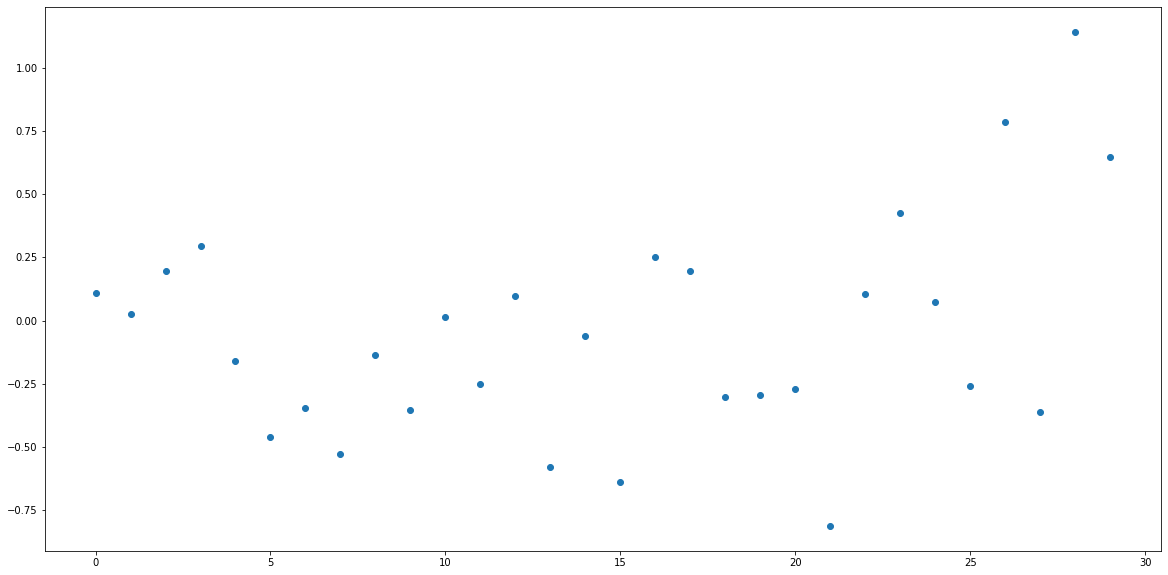

In [ ]:
plt.scatter(list(range(len(x_test))), preds - y_test)

Корреляционный анализ и выводы о целесообразности построения регрессии для Chemical_process.sta;

In [ ]:
data_c = pd.read_csv('')

In [ ]:
data_c_w

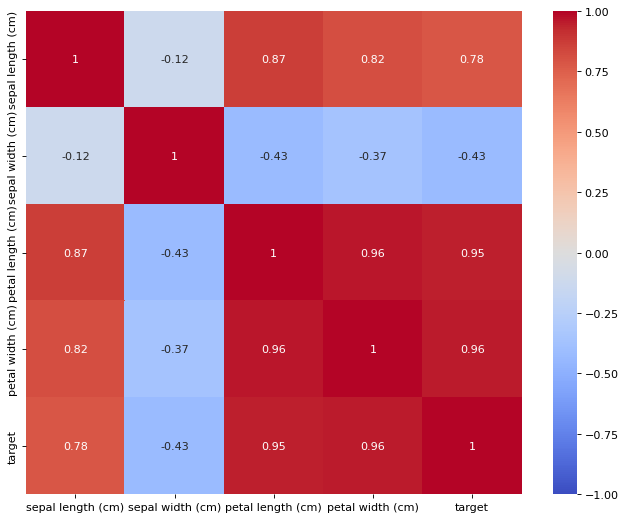

In [ ]:
import seaborn as sns
figure(figsize=(10, 8), dpi=80)
sns.heatmap(data_c_w.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

По тепловой карте видна сильная линейная взаимосвязь некоторых переменных(>0.9). 

In [ ]:
import pingouin as pg

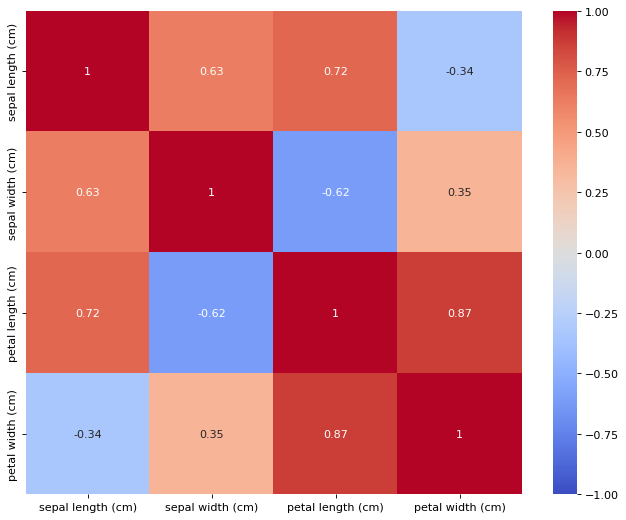

In [ ]:
figure(figsize=(10, 8), dpi=80)
sns.heatmap(data_c_w.pcorr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Вывод:

In [ ]:
data = pd.read_csv("/content/Chemical_process.csv")

In [ ]:
data

<bound method DataFrame.info of          YIELD         HCL         NH3         H20    CATALYST
0   59,5668403  12,0718253  12,4206519   12,226249  9,34286019
1   61,2219727  9,93095187  10,8588672   10,124134  8,18025758
2   61,0310989  9,77530747  7,83677175  7,77680288  8,28966643
3   61,8486942  9,44677572       12,42  10,5518509  11,2684256
4   59,4272822  11,9083987       12,39   8,2083346  10,3972747
..         ...         ...         ...         ...         ...
95  59,3579389  11,1423841  10,5504776  11,8939024  11,3262581
96  60,5671447  12,3135319  10,9916227  9,09138768  12,0896786
97  60,3805236  10,3620258  10,1139103  11,1843471  11,0872982
98  59,8842668  12,4363689  11,3387707  9,23711356  9,48675497
99   60,108877  12,3362682  9,60150456  8,41967528  7,84440138

[100 rows x 5 columns]>